In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import pandas_profiling

## 1. Download & Load Data 


In [6]:
if 'data' not in os.listdir('..') or 'train.csv' not in os.listdir('../data'):
    print('downloading kaggle data')
    ! mkdir ../data
    ! kaggle competitions download -c titanic
    ! unzip titanic.zip
    ! mv *.csv ../data
    ! rm titanic.zip
    ! mkdir ../data/submissions
    ! mv ../data/*_submission* ../data/submissions/
else:
    print('kaggle data already downloaded in ../data')
    
DATA_PATH = Path('../data')


downloading kaggle data
  0%|                                               | 0.00/34.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 4.09MB/s]
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [10]:
train = pd.read_csv(DATA_PATH / 'train.csv', index_col=0)
test = pd.read_csv(DATA_PATH / 'test.csv', index_col=0)

low_func = lambda x: x.lower()

train.columns = map(low_func, train.columns)
test.columns = map(low_func, test.columns)

print('train', train.shape)
print('test', test.shape)

train (891, 11)
test (418, 10)


**variable exploration**

pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## 2. Data Analysis & Cleansing

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    418 non-null    int64  
 1   name      418 non-null    object 
 2   sex       418 non-null    object 
 3   age       332 non-null    float64
 4   sibsp     418 non-null    int64  
 5   parch     418 non-null    int64  
 6   ticket    418 non-null    object 
 7   fare      417 non-null    float64
 8   cabin     91 non-null     object 
 9   embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


Immediately we see that cabin is a sparse column that has a lot of nulls. 

Age, Embarked & Fare also have null values to deal with

In [22]:
train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot: >

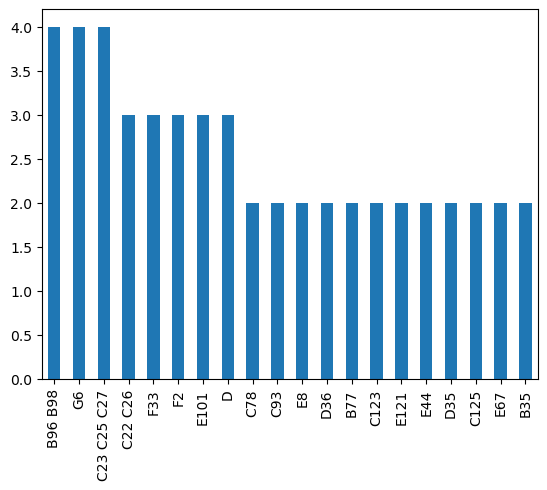

In [26]:
train.cabin.value_counts()[:20].plot.bar()

In [59]:
sns.distplot(train, x='embarked', hue='survived', multiple='dodge')

TypeError: distplot() got an unexpected keyword argument 'hue'

In [31]:
# most people embarked in Southampton so fill na values with an S
train['embarked'] = train.embarked.fillna('S')

# interesting to note that a higher ratio of passengers from C survived

<AxesSubplot: xlabel='age', ylabel='Count'>

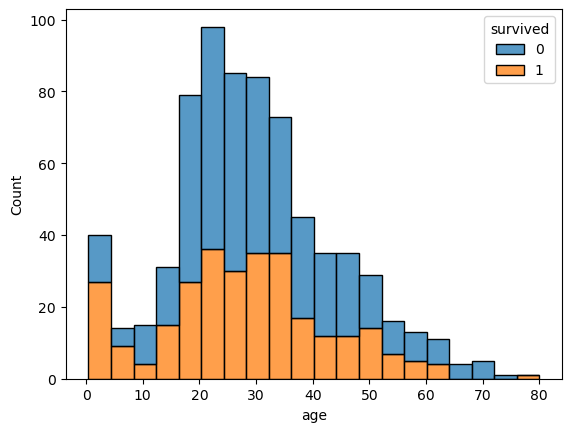

In [56]:
sns.histplot(train, x='age', hue='survived', multiple='stack')

It appears that children, the elderly, 

<AxesSubplot: xlabel='age', ylabel='Count'>

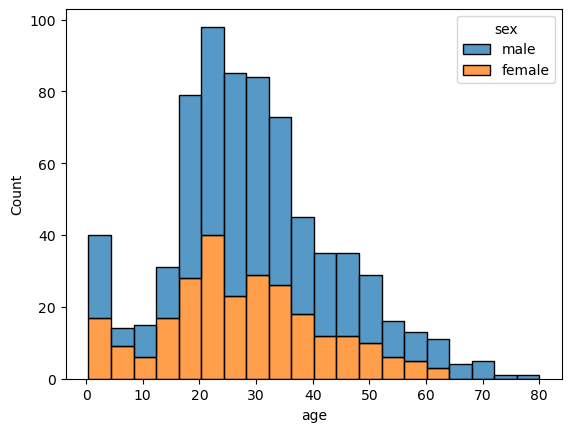

In [50]:
sns.histplot(train, x='age', hue='sex', multiple='stack')

<AxesSubplot: xlabel='survived', ylabel='Count'>

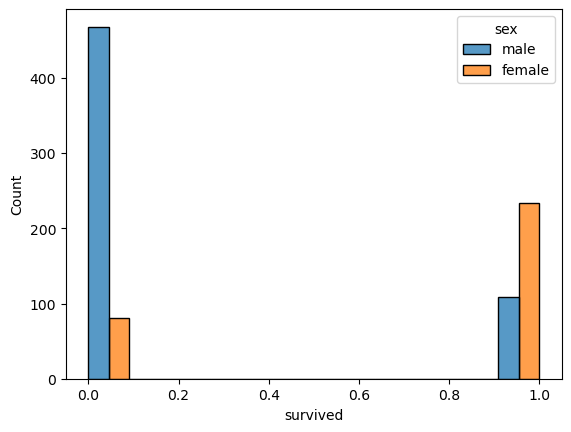

In [51]:
sns.histplot(train, x='survived', hue='sex', multiple='dodge')

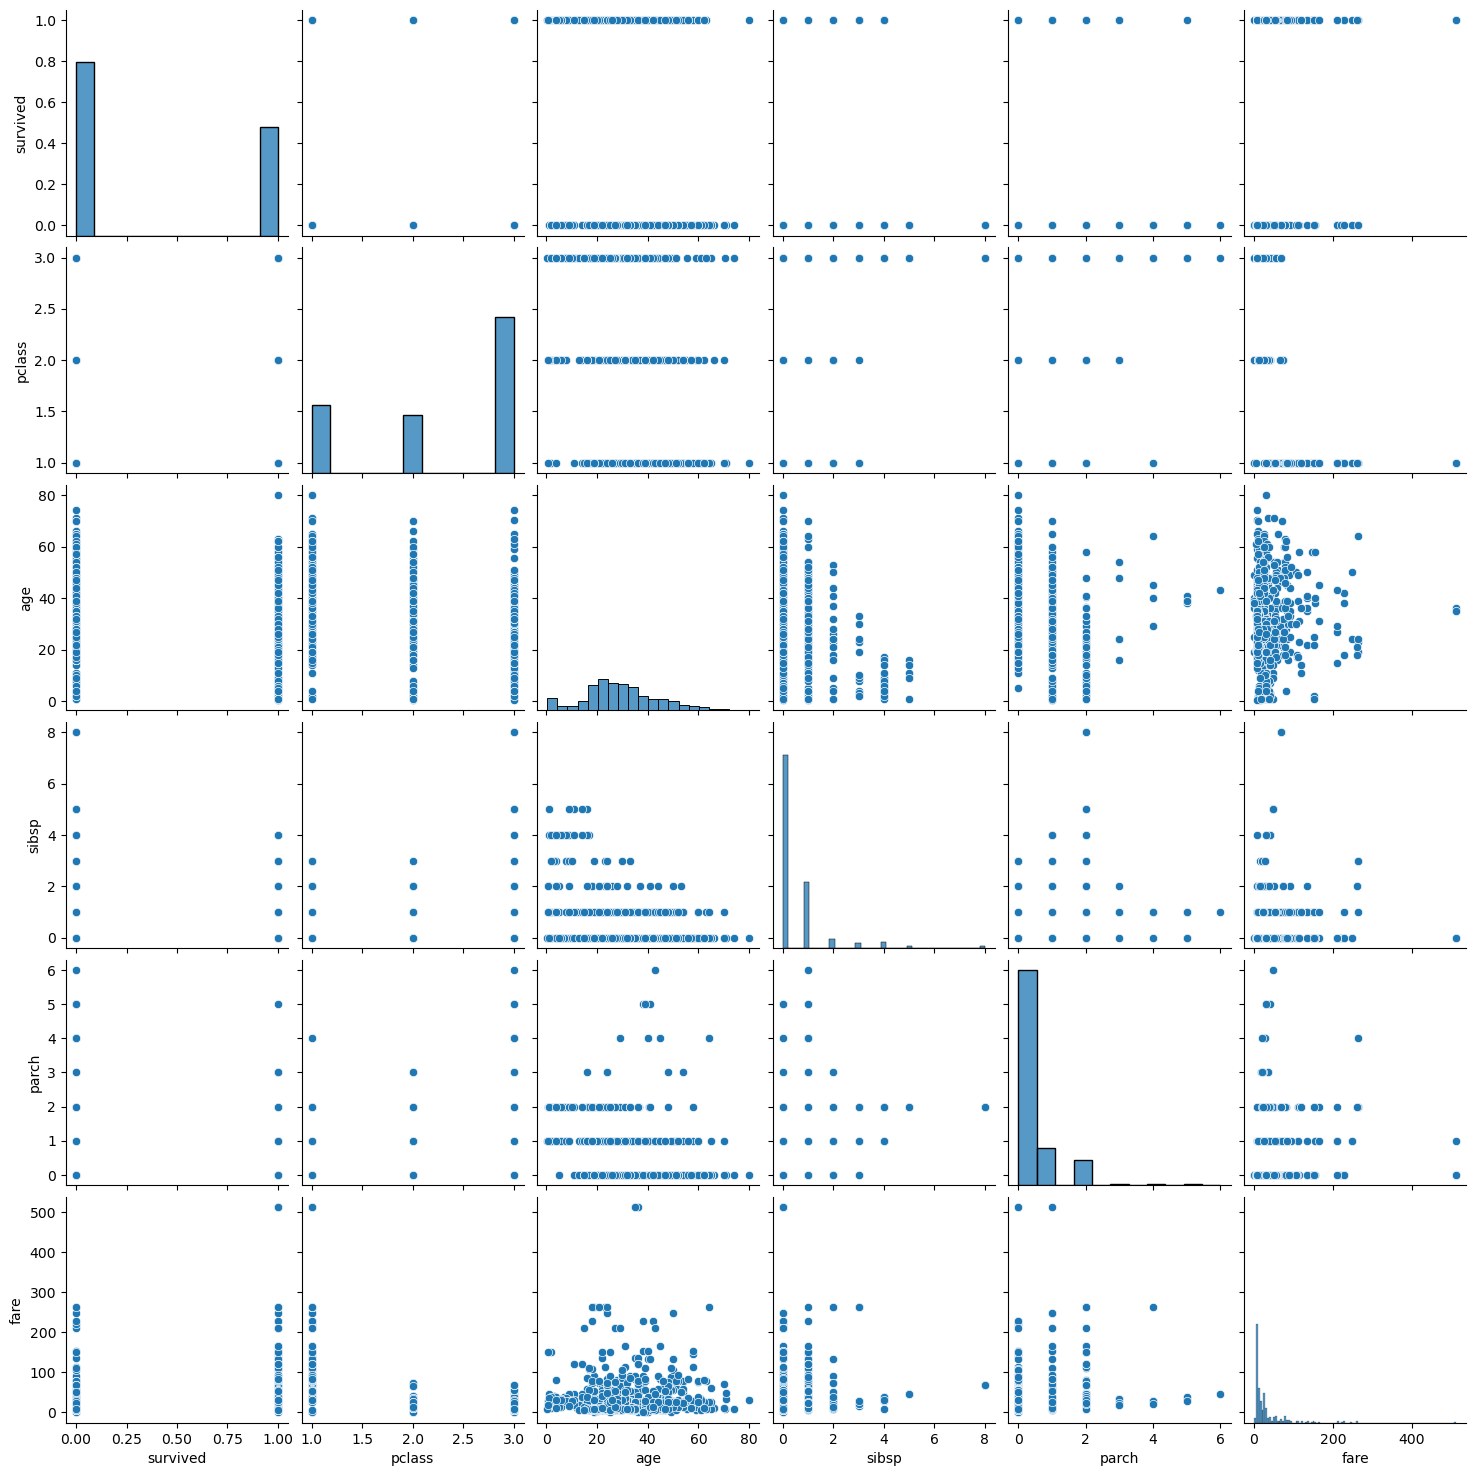

In [21]:
# Examine initial correlations using a pairplot
sns.pairplot(train)
plt.show()

## 3. Feature Engineering

In [16]:
# target encoding vs one hot

In [29]:

train['sex'] = train.sex.map({'male': 0, 'female': 1})

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    1
890    0
891    0
Name: sex, Length: 891, dtype: int64